In [1]:
import os
import cv2
import numpy as np

from matplotlib import pyplot as plt
# Plot inline
%matplotlib inline

import utils

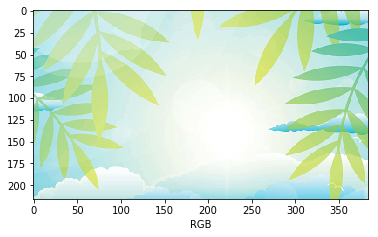

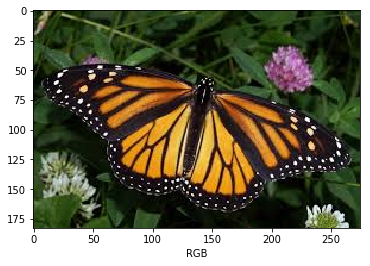

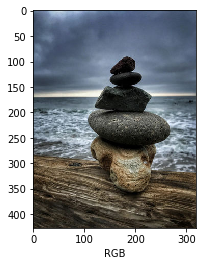

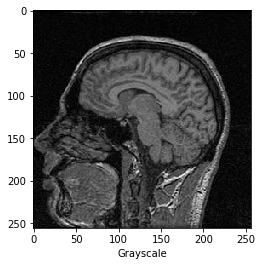

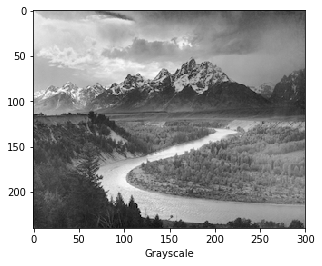

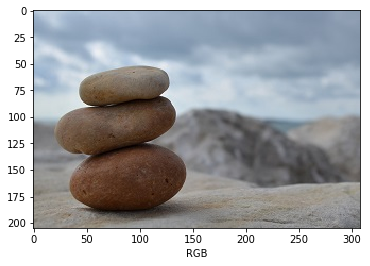

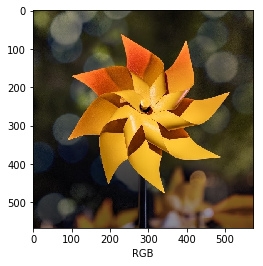

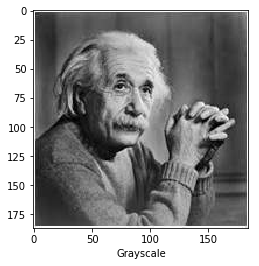

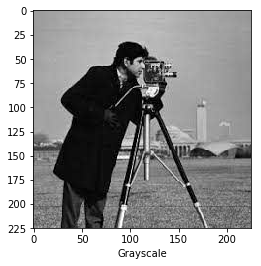

In [2]:
# 2.1 

def isgray(img):
    if img.shape[2]  == 1 or len(img.shape) < 3: return True
    b,g,r = cv2.split(img)
    if (b==g).all() and (b==r).all(): return True
    return False

IMAGES_PATHS = [os.path.join("images",path) for path in os.listdir("images")]
for img_path in IMAGES_PATHS:
    img = cv2.imread(img_path)
    img_type = "Grayscale" if isgray(img) else "RGB"
    # reversing the channels (bgr -> rgb for display)
    img = img[:,:,::-1]
    plt.figure()
    plt.imshow(img)
    plt.xlabel(img_type)

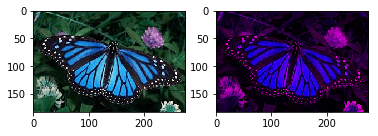

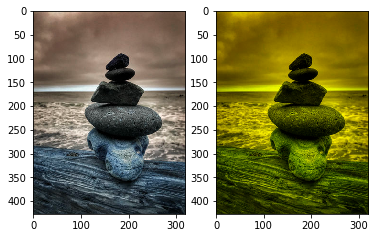

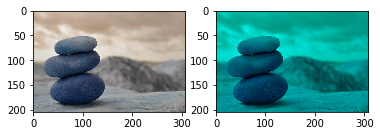

In [3]:
# 2.2
orig_img = cv2.imread(IMAGES_PATHS[1])
new_img = utils.rgbExclusion(orig_img, "g")

f, axarr = plt.subplots(1,2)
axarr[0].imshow(orig_img)
axarr[1].imshow(new_img)

orig_img = cv2.imread(IMAGES_PATHS[2])
new_img = utils.rgbExclusion(orig_img, "r")

f, axarr = plt.subplots(1,2)
axarr[0].imshow(orig_img)
axarr[1].imshow(new_img)

orig_img = cv2.imread(IMAGES_PATHS[5])
new_img = utils.rgbExclusion(orig_img, "b")

f, axarr = plt.subplots(1,2)
axarr[0].imshow(orig_img)
axarr[1].imshow(new_img)

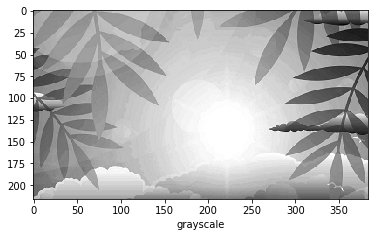

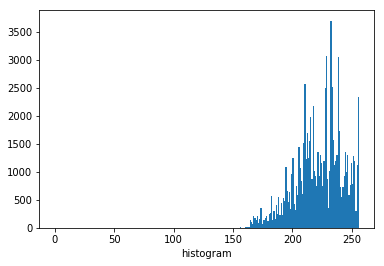

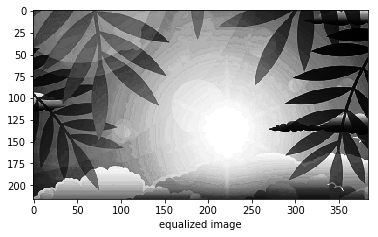

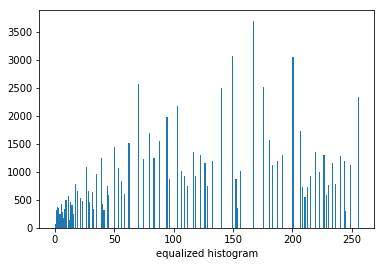

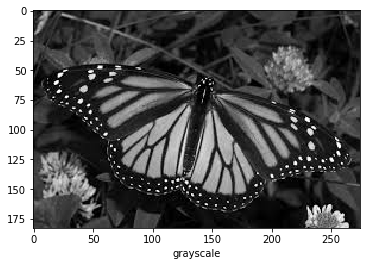

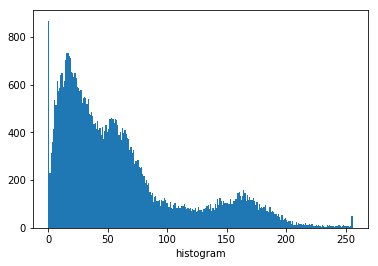

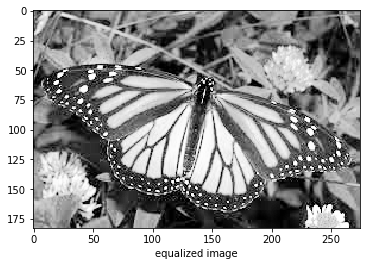

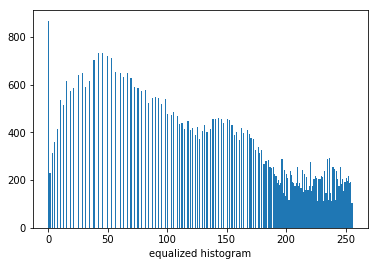

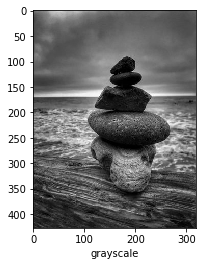

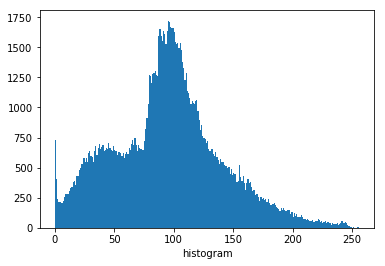

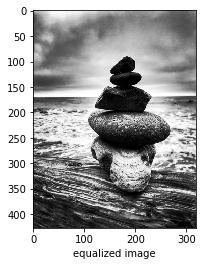

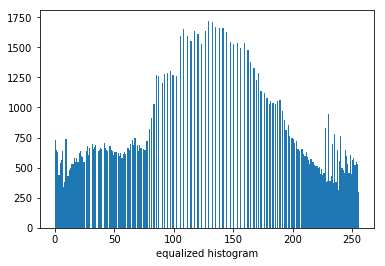

In [4]:
# 2.3
for img_path in IMAGES_PATHS[:3]:
    img = cv2.imread(img_path,0)
    equ_img = cv2.equalizeHist(img) 
    
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.xlabel("grayscale")
    
    plt.figure()
    plt.hist(img.ravel(),256,[0,256])
    plt.xlabel("histogram")
    
    plt.figure()
    plt.imshow(equ_img,cmap='gray')
    plt.xlabel("equalized image")
    
    plt.figure()
    plt.hist(equ_img.ravel(),256,[0,256])
    plt.xlabel("equalized histogram")
    
    plt.show()

In [5]:
def convolution(image, kernel):

    # Flip the kernel for convolution
    kernel = np.flipud(np.fliplr(kernel))

    x_img, y_img = image.shape[0], image.shape[1]
    x_kernel, y_kernel = kernel.shape[0], kernel.shape[1]

    # convolution output
    output = np.zeros_like(image)
    padding = (y_kernel - 1)//2
    
    # Add zero padding to the input image
    padded_image = np.zeros((image.shape[0] + 2*padding, image.shape[1] + 2*padding))
    padded_image[padding:-padding, padding:-padding] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            output[y, x] = (kernel * padded_image[y: y+3, x: x+3]).sum()
                
    return output

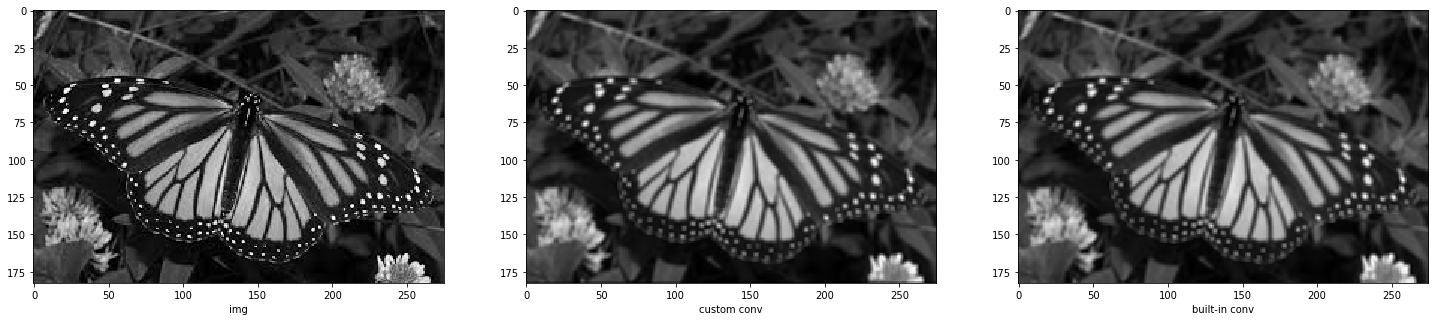

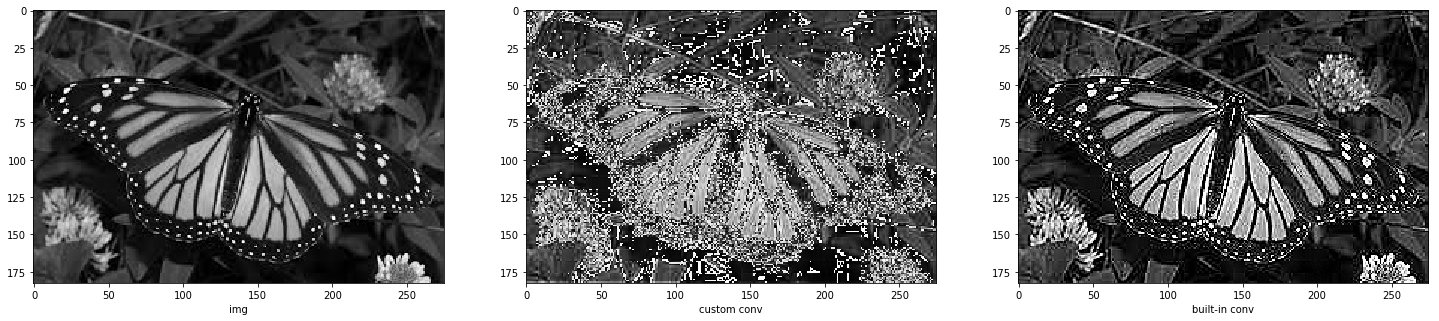

In [6]:
# 2.4
img = cv2.imread(IMAGES_PATHS[1],0)

# blurring filter
kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0
out_img = utils.convolution(img, kernel)
cv_filter_img = cv2.filter2D(img, -1, kernel)

f, axarr = plt.subplots(1,3, figsize=(25,8))
axarr[0].imshow(img, cmap="gray")
axarr[0].set_xlabel("img")
axarr[1].imshow(out_img, cmap="gray")
axarr[1].set_xlabel("custom conv")
axarr[2].imshow(cv_filter_img, cmap="gray")
axarr[2].set_xlabel("built-in conv")

plt.show()

# sharpening filter
kernel = np.array(([0, -1, 0],[-1, 5, -1],[0, -1, 0]))
out_img = utils.convolution(img, kernel)
cv_filter_img = cv2.filter2D(img, -1, kernel)

f, axarr = plt.subplots(1,3, figsize=(25,8))
axarr[0].imshow(img, cmap="gray")
axarr[0].set_xlabel("img")
axarr[1].imshow(out_img, cmap="gray")
axarr[1].set_xlabel("custom conv")
axarr[2].imshow(cv_filter_img, cmap="gray")
axarr[2].set_xlabel("built-in conv")

plt.show()

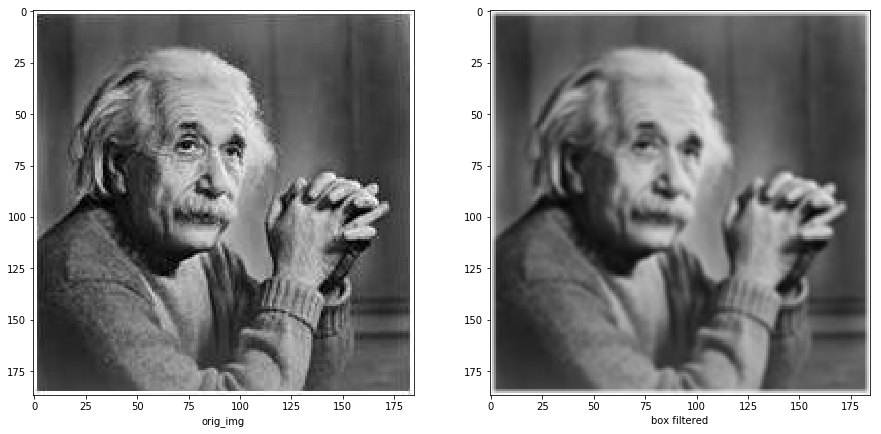

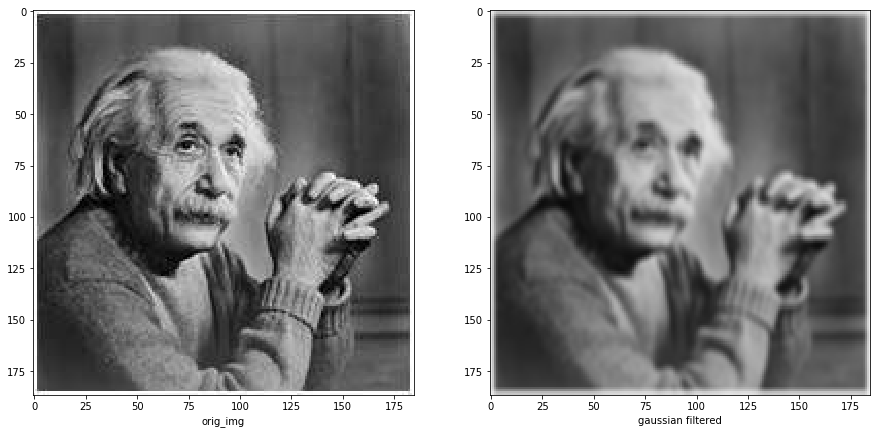

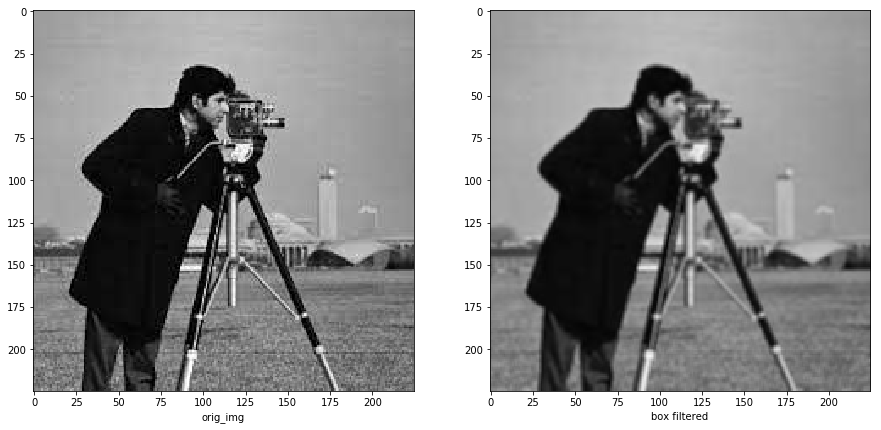

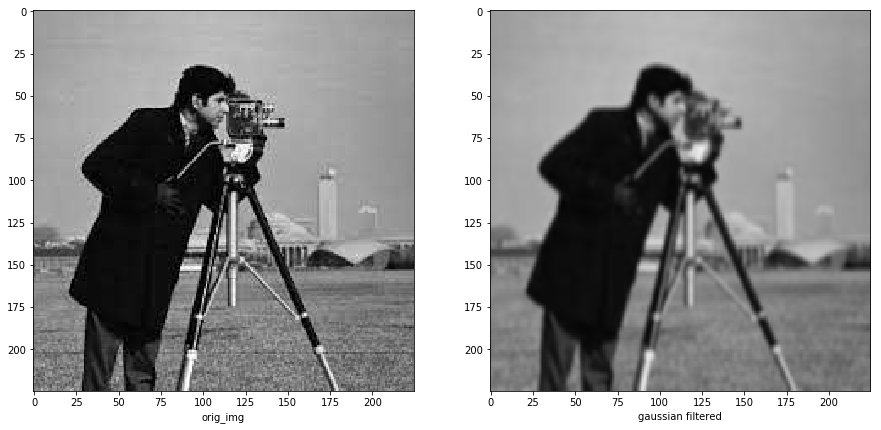

In [7]:
# 2.5.1
for img_path in IMAGES_PATHS[-2:]:
    img = cv2.imread(img_path)
    
    box_filter = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0
    out = cv2.filter2D(img, -1, box_filter)
    
    f, axarr = plt.subplots(1,2, figsize=(15,8))
    axarr[0].imshow(img)
    axarr[0].set_xlabel("orig_img")
    axarr[1].imshow(out)
    axarr[1].set_xlabel("box filtered")
    
    # 2.5.2
    out = cv2.GaussianBlur(img,(5,5),0, 2, 2)
    
    f, axarr = plt.subplots(1,2, figsize=(15,8))
    axarr[0].imshow(img)
    axarr[0].set_xlabel("orig_img")
    axarr[1].imshow(out)
    axarr[1].set_xlabel("gaussian filtered")

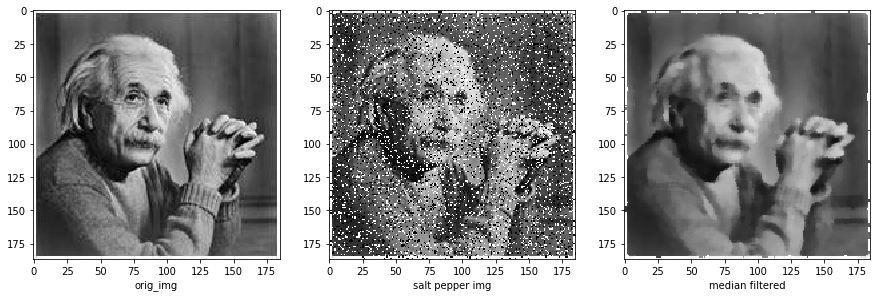

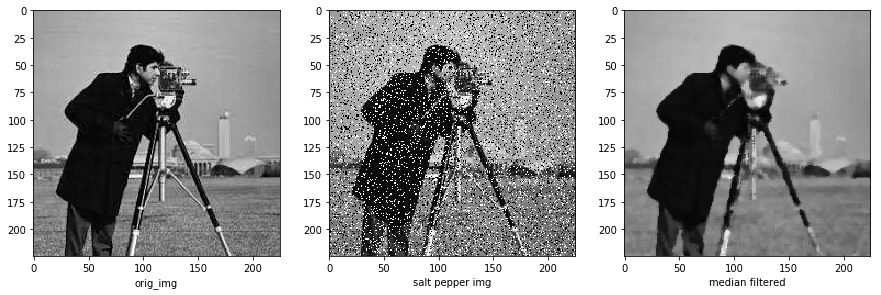

In [8]:
# 2.5.3
for img_path in IMAGES_PATHS[-2:]:
    img = cv2.imread(img_path)
    
    salt_pepper_img = utils.salt_and_pepper(img, 0.1)
    out = cv2.medianBlur(salt_pepper_img,5)
    
    f, axarr = plt.subplots(1,3, figsize=(15,8))
    axarr[0].imshow(img)
    axarr[0].set_xlabel("orig_img")
    axarr[1].imshow(salt_pepper_img)
    axarr[1].set_xlabel("salt pepper img")
    axarr[2].imshow(out)
    axarr[2].set_xlabel("median filtered")

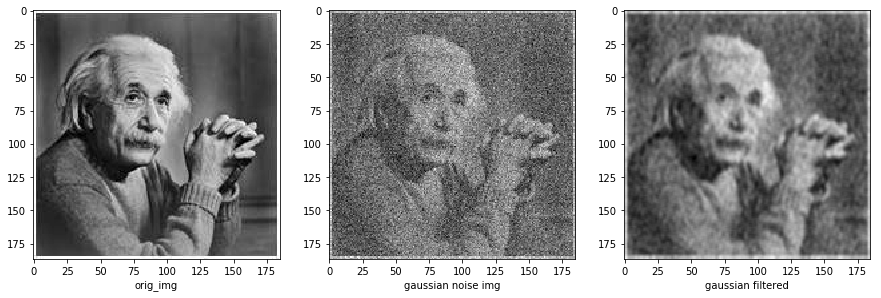

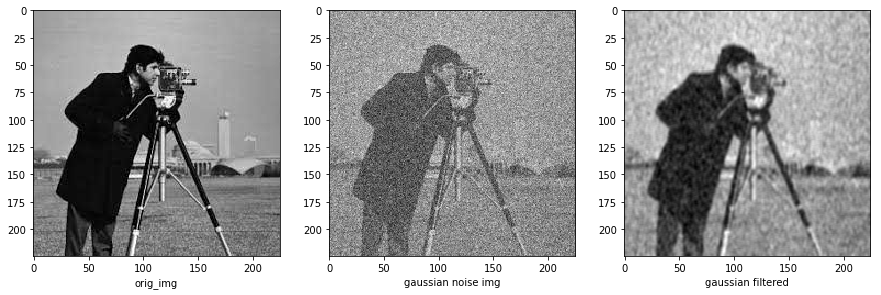

In [9]:
# 2.5.4
for img_path in IMAGES_PATHS[-2:]:
    img = cv2.imread(img_path,0)
    
    gaussian_img = utils.gaussian_noise(img)
    out = cv2.GaussianBlur(gaussian_img,(5,5),0, 2, 2)
    
    f, axarr = plt.subplots(1,3, figsize=(15,8))
    axarr[0].imshow(img, cmap="gray")
    axarr[0].set_xlabel("orig_img")
    axarr[1].imshow(gaussian_img, cmap="gray")
    axarr[1].set_xlabel("gaussian noise img")
    axarr[2].imshow(out, cmap="gray")
    axarr[2].set_xlabel("gaussian filtered")
plt.show()

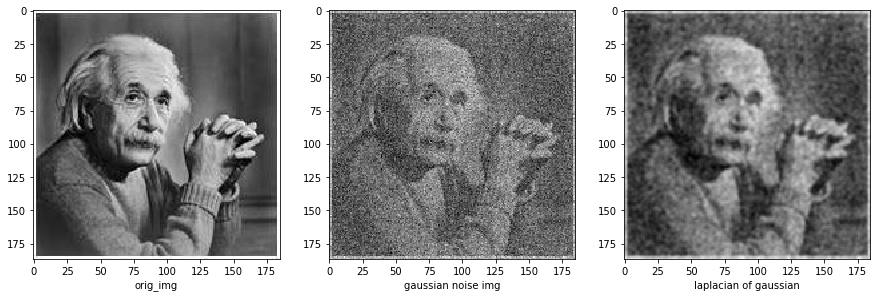

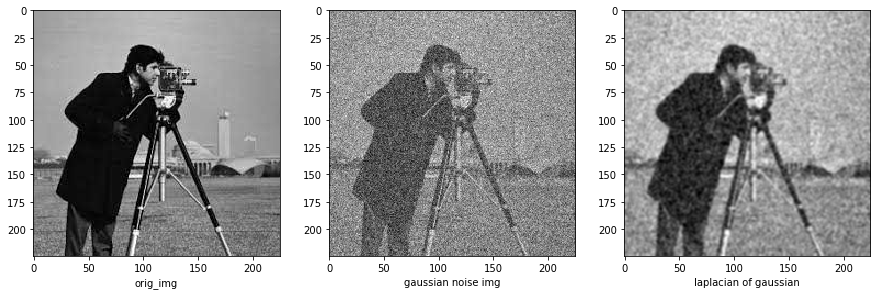

In [10]:
#2.5.5
for img_path in IMAGES_PATHS[-2:]:
    img = cv2.imread(img_path,0)
    
    gaussian_img = utils.gaussian_noise(img)
    out = cv2.GaussianBlur(gaussian_img,(5,5),0)
 
    laplacian = cv2.Laplacian(out,cv2.CV_64F)

    f, axarr = plt.subplots(1,3, figsize=(15,8))
    axarr[0].imshow(img, cmap="gray")
    axarr[0].set_xlabel("orig_img")
    axarr[1].imshow(gaussian_img, cmap="gray")
    axarr[1].set_xlabel("gaussian noise img")
    axarr[2].imshow(out, cmap="gray")
    axarr[2].set_xlabel("laplacian of gaussian")
plt.show()

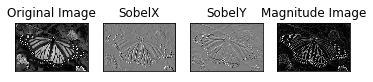

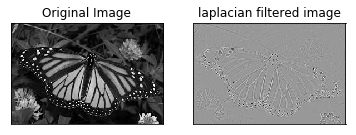

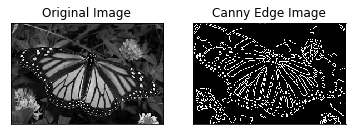

In [11]:
# 2.6.1

img = cv2.imread(IMAGES_PATHS[1],0)
gradX = cv2.Sobel(img, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(img, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)

grad = np.sqrt(gradX**2 + gradY**2)
grad_norm = (grad * 255 / grad.max()).astype(np.uint8)

# gradient = cv2.subtract(gradX, gradY)
# gradient = cv2.convertScaleAbs(gradient)

plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(gradX,cmap = 'gray')
plt.title('SobelX'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(gradY, cmap = 'gray')
plt.title('SobelY'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(grad_norm,cmap = 'gray')
plt.title('Magnitude Image'), plt.xticks([]), plt.yticks([])
plt.show()

# 2.6.2
img = cv2.imread(IMAGES_PATHS[1],0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(laplacian,cmap = 'gray')
plt.title('laplacian filtered image'), plt.xticks([]), plt.yticks([])
plt.show()

# 2.6.3
img = cv2.imread(IMAGES_PATHS[1],0)
edges = cv2.Canny(img,150,300)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()